In [1]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
import util
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)


In [2]:
# Parameters
Two,Ttrain = 2000,100000
N = 10
C = 0
rho=0.6
sigma=1
dim = 2
N_d = int(N * dim)
actf="tanh"


torch.manual_seed(0)

esn_idwin = ESN.ESN_mult(N_d, uC=C,rho=rho,sigma=sigma, dim=dim,rseed=0,idWin=True)
esn = ESN.ESN_mult(N_d, uC=C, rho=rho,sigma=sigma,dim=dim,rseed=0,idWin=False)


In [2]:
fn_in = "10N_2din"
xy = torch.load('./experiments/inputs/'+fn_in+'_i.pt')

u1 = xy[0]
u2 = xy[1]

u = torch.vstack((u1,u1*u2))
u_tilde = xy


/tmp/ipykernel_4151/1566761288.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  xy = torch.load('./experiments/inputs/'+fn_in+'_i.pt')


In [9]:
fn = "nl_spaceCorr"
torch.save(u,f"./experiments/inputs/{fn}_i.pt")


In [5]:
## Both already saved
## nl_spaceCorr(_id)_d
""" NOT ID WIN  
st = time.time()
Xwo = esn.run_washout(u, Two, actf=actf,bias=False)
print("runtime :",time.time()-st)
"""
""" ID WIN
st = time.time()
Xwo_id = esn_idwin.run_washout(u, Two, actf=actf,bias=False)
print("runtime :",time.time()-st)
  """

runtime : 15.230823516845703
runtime : 15.089776277542114


In [5]:

## make targets
maxdd=[[1,20],
       [2,10],
       [3,10],
       [4,7],
       [5,7],
       [6,3],
       [7,2]]

st = time.time()
tar_naive = ESN.make_targets(u=u,maxddsets=maxdd,Two=Two)
print(r"target creation time:%.3f s"%(time.time()-st))

#torch.save(tar_naive,f"./experiments/target_info/{fn}_naive_ti.pt")

basis table creation:0.002 s
1 degree:40 target functions
2 degree:210 target functions
3 degree:1540 target functions
4 degree:2380 target functions
5 degree:8568 target functions
6 degree:462 target functions
7 degree:120 target functions
Total of 13320 bases
 7/7 degree bases now calculating ...
target creation complete, total of 13320 bases
target creation time:1185.039 s


In [6]:
memory_in_bytes = tar_naive.tar_f.numel() * tar_naive.tar_f.element_size()
memory_in_mb = memory_in_bytes / (1024 ** 2)

print(f"Memory usage: {memory_in_mb:.2f} MB")

Memory usage: 10162.35 MB


In [3]:
fn="nl_spaceCorr"

In [4]:
Xwo = torch.load(f"./experiments/datamatrices/{fn}_d.pt",weights_only=False)
#Xwo_id = torch.load(f"./experiments/datamatrices/{fn}_id_d.pt")


In [5]:
tar_naive = torch.load(f"./experiments/target_info/{fn}_naive_ti.pt",weights_only=False)
st = time.time()
raw,thr,thr_scl,rev,sur = ESN.calc_capacity(Xwo,tar_naive.tar_f,ret_all=True,thr_scale=1.2,mean_normalization=True)
print(r"ipc calc time :%.3f s"%(time.time()-st))

print(sur)

ipc_naive = ESN.IPC_w_targetinfo(raw,tar_naive)

util.print_ipc(ipc_naive)


KeyboardInterrupt



In [ ]:
torch.save(ipc_naive,f"./experiments/ipcs/{fn}_naive_ipc.pt")

In [5]:
fn_in = "10N_2din"
tar_tilde = torch.load(f"./experiments/target_info/{fn_in}_ti.pt",weights_only=False)
st = time.time()
raw_tilde,thr_tilde,thr_scl_tilde,rev_tilde,sur_tilde = ESN.calc_capacity(Xwo,tar_tilde.tar_f,ret_all=True,thr_scale=1.2)
print(r"ipc calc time :%.3f s"%(time.time()-st))

print(sur_tilde)

ipc_tilde = ESN.IPC_w_targetinfo(thr_scl_tilde,tar_tilde)

util.print_ipc(ipc_tilde)

ipc calc time :1.048 s


NameError: name 'sur' is not defined

In [9]:
torch.save(ipc_tilde,f"./experiments/ipcs/{fn}_ipc.pt")

In [6]:
if 1:
    ipc_tilde = torch.load(f"./experiments/ipcs/{fn}_ipc.pt",weights_only=False)
    
util.print_ipc(ipc_tilde)

1 deg ipc: 5.116489749083288
2 deg ipc: 6.049653188017159
3 deg ipc: 4.220129742422758
4 deg ipc: 3.091500313545149
5 deg ipc: 1.0886949041709706
6 deg ipc: 0.22445473507063443
7 deg ipc: 0.024973444606567745
total ipc: 19.81589607691653


RESULT FOR NORMALIZED IPC


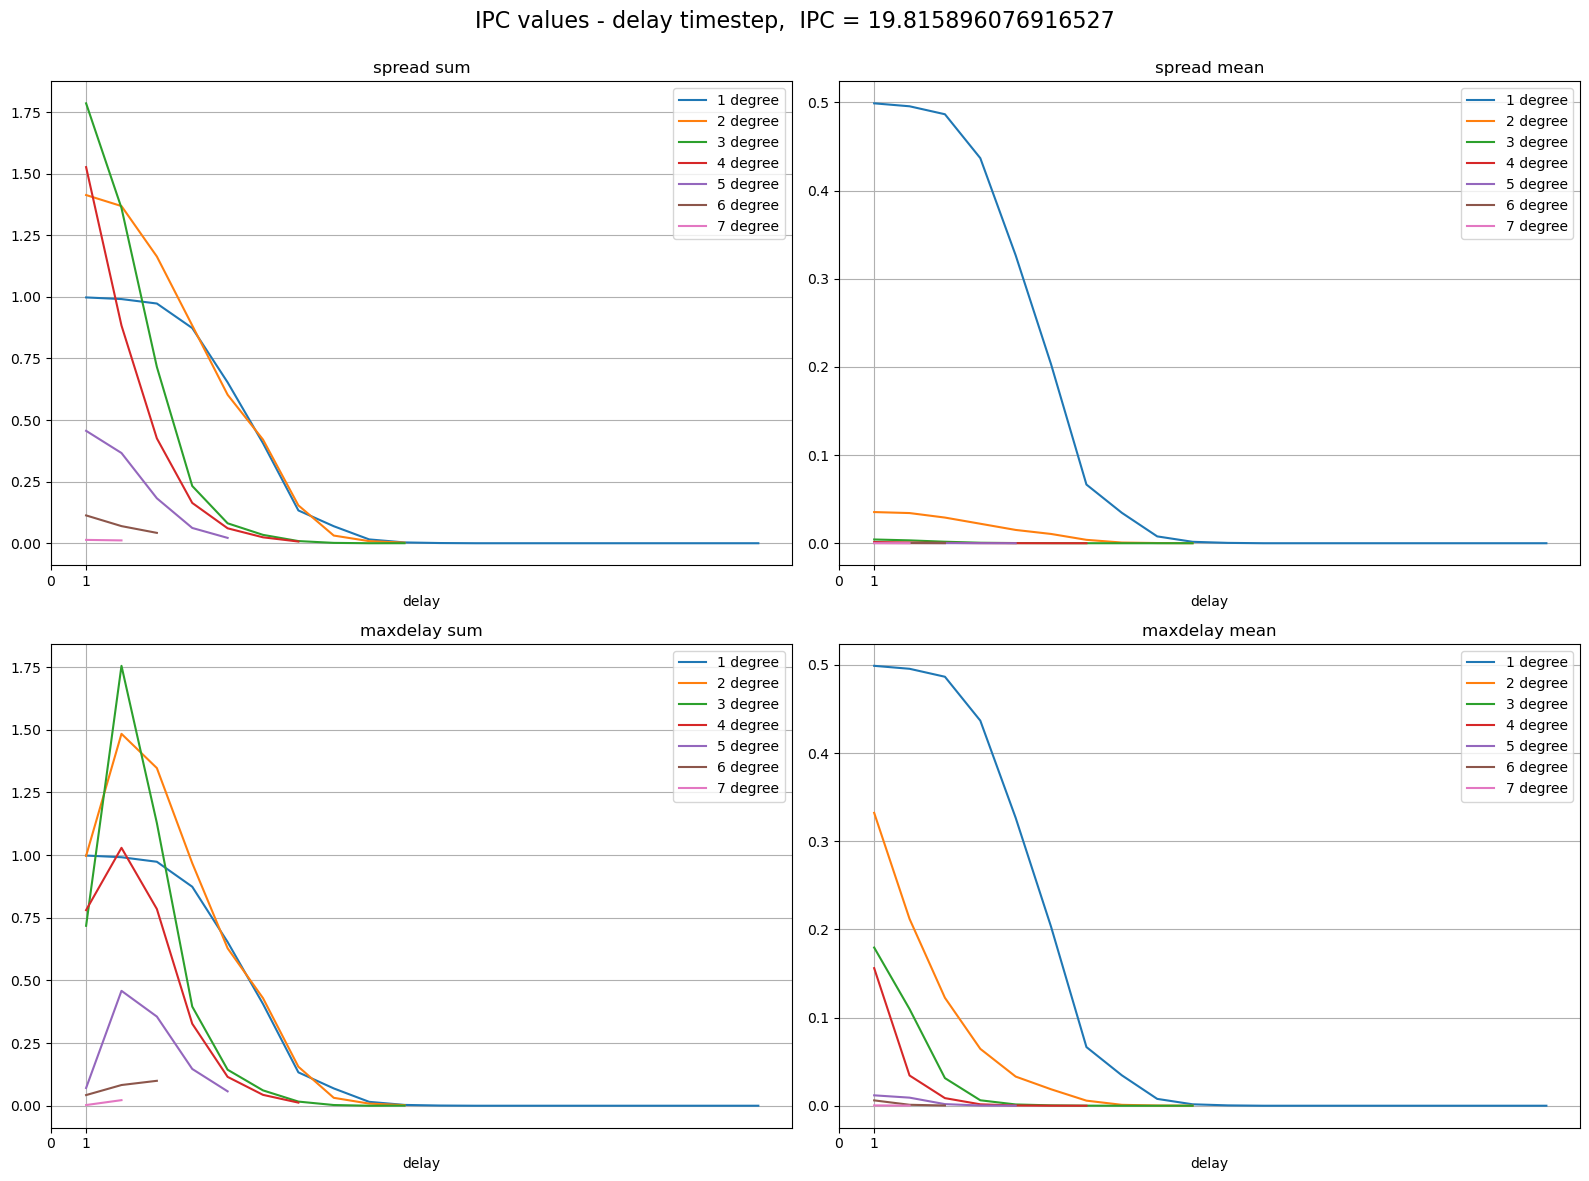

In [7]:
print("RESULT FOR NORMALIZED IPC")
util.ipc_tau_plot(ipc_tilde)
#print("RESULT FOR NAIVE IPC")
#util.ipc_tau_plot(ipc_naive)